In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import os, sys
import re
from pyLIMA import telescopes
from pyLIMA.models import PSBL_model
from pyLIMA.models import USBL_model

from pyLIMA.models import FSPLarge_model
from pyLIMA.outputs import pyLIMA_plots
from pyLIMA import event
from tqdm.auto import tqdm
from astropy.time import Time
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

home = '/home/anibal/'
sys.path.append(home + '/roman_rubin/fit_codes')
# this codes are in the /fit_codes directory 
# https://github.com/anibal-art/roman_rubin/tree/main/fit_codes
# from fit_results import chi_dof, best_model, event_fits, sigmas
# from filter_curves import read_curves
# from analysis_metrics import m1,m2,m3, fit_true, metrics_from_df, sigma_ratio, bias_ratio, fit_values
from plot_models import plot_LCmodel
from plot_lightcurves import model
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
# from plot_models import plot_only_model

import sys,os
home = '/home/anibal/'
sys.path.append(home + '/roman_rubin')
from roman_rubin import fit_rubin_roman
from roman_rubin import read_data
from roman_rubin import sim_event

In [16]:
# '/home/anibal/roman_rubin/simulation/dataSlice_rolling.npy'
path_ephemerides = '/home/anibal/files_db/james_webb.txt' #PATH TO EPHEMERIDES
path = '/home/anibal/results_roman_rubin/FFP_final/FFP/'
save_results = path+'results/'
path_set_sim = [path+'set_sim'+str(i)+'/' for i in range(1,9)]
path_set_fit = [path+'set_fit'+str(i)+'/' for i in range(1,9)]


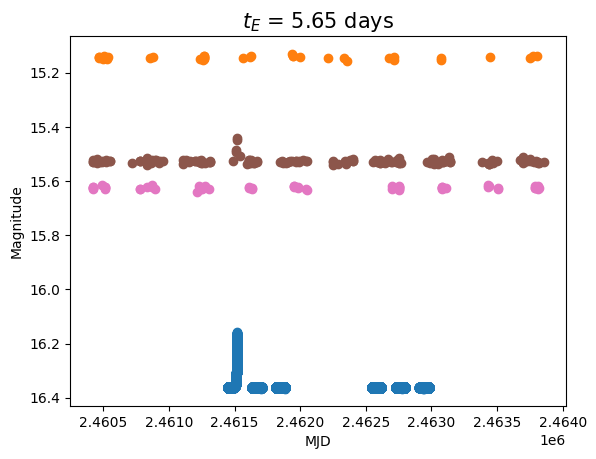

In [17]:
source = 7085#6187
nset = int(source/5000)
nsource=int(source-5000*nset)
path_event = path+f'set_sim{nset}/Event_{source-nset*5000}.h5'
data, params, bands = read_data(path_event)
data_fit = np.load(path+f'set_fit{nset}/Event_RR_{source-nset*5000}_TRF.npy',allow_pickle=True).item()

# print(data_fit['best_model'][4:6])

# print(np.sqrt(np.diag(data_fit['covariance_matrix']))[4:6])
# print(np.sqrt(np.diag(data_fit['covariance_matrix']))[4:6]/data_fit['best_model'][4:6])
plt.close('all')
for b in bands:
    plt.errorbar(bands[b]['time'],bands[b]['mag'],bands[b]['err_mag'],marker='o',ls='')
plt.gca().invert_yaxis()
plt.xlabel('MJD')
plt.ylabel('Magnitude')
# plt.xlim(params['t0']-8*params['tE'],params['t0']+8*params['tE'])
plt.title(r'$t_E$ = '+f"{round(params['tE'],2)} days",fontsize=15)
plt.show()


In [18]:
# data

In [19]:

sim_event

<function roman_rubin.sim_event(i, data, path_ephemerides, path_dataslice, model)>

In [20]:
params

{'fblend_W149': 993.3450477039107,
 'fblend_g': 90441.81193099408,
 'fblend_i': 45346.570258099346,
 'fblend_r': 46070.38407526747,
 'fblend_u': 20565.801320899784,
 'fblend_y': 12391.404584800843,
 'fblend_z': 4001.903594931103,
 'fsource_W149': 30693.572954009673,
 'fsource_g': 196900.77673649244,
 'fsource_i': 56325.10978853824,
 'fsource_r': 128672.70145146486,
 'fsource_u': 36240.9560897775,
 'fsource_y': 14057.031683742747,
 'fsource_z': 55263.32992909047,
 'ftotal_W149': 31686.918001713584,
 'ftotal_g': 287342.5886674865,
 'ftotal_i': 101671.68004663759,
 'ftotal_r': 174743.08552673232,
 'ftotal_u': 56806.75741067728,
 'ftotal_y': 26448.43626854359,
 'ftotal_z': 59265.23352402157,
 'gblend_W149': 0.03236329146796657,
 'gblend_g': 0.45932684182363676,
 'gblend_i': 0.8050862293627886,
 'gblend_r': 0.3580431867488626,
 'gblend_u': 0.5674740277257968,
 'gblend_y': 0.8815093302472785,
 'gblend_z': 0.07241517295584665,
 'piEE': -0.0003958690672665,
 'piEN': 0.0019575599407397,
 'rho':

In [21]:
# os.listdir('/home/anibal/roman_rubin/simulation/')

In [22]:

trilegal_data = pd.read_csv(f'/home/anibal/results_roman_rubin/FFP_uni_split_{nset}.csv').iloc[nsource]
trilegal_data
trilegal_data['tE']=trilegal_data['te']
path_to_save = home + '/results_roman_rubin/'+'cadence_custom_FFP/'

%matplotlib widget
plt.close('all')
path_dataslice = '/home/anibal/roman_rubin/simulation/dataSlice_custom_roman.npy'

my_own_model, pyLIMA_parameters, all_residuals, b = sim_event(source,  trilegal_data, path_ephemerides, path_dataslice,'FSPL')


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Parallax(Full) estimated for the telescope W149: SUCCESS
Parallax(Full) estimated for the telescope u: SUCCESS
Parallax(Full) estimated for the telescope g: SUCCESS
Parallax(Full) estimated for the telescope r: SUCCESS
Parallax(Full) estimated for the telescope i: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS
[2461524.7690079208, 0.8155728614150288, 5.646070425265917, 0.0107375172572834, 0.0019575599407397, -0.0003958690672665, 26979.012093614812, 4707.905908098771, 46142.82046125391, 10663.936949423372, 234320.20192328942, 53022.38674419714, 96282.68517945865, 78460.40034727368, 75771.07475023436, 25900.605296403217, 35859.24121099295, 23405.992313028608, 16677.863593179893, 9770.572675363697]


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 36 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 36 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "epv00" yielded 36 of "warning: date outsidethe range 1900-2100 AD"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 36 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erf

A good event to fit


In [23]:
from pyLIMA.fits import TRF_fit
def fit_rubin_roman(Source, event_params, path_save, path_ephemerides, model, algo, Origin, wfirst_lc, lsst_u, lsst_g,
                    lsst_r, lsst_i, lsst_z,
                    lsst_y):
    '''
    Perform fit for Rubin and Roman data for fspl, usbl and pspl
    
    '''

    tlsst = 60350.38482057137 + 2400000.5
    RA, DEC = 267.92497054815516, -29.152232510353276
    e = event.Event(ra=RA, dec=DEC)
    if len(lsst_u) + len(lsst_g) + len(lsst_r) + len(lsst_i) + len(lsst_z) + len(lsst_y) == 0:
        e.name = 'Event_Roman_' + str(int(Source))
    else:
        e.name = 'Event_RR_' + str(int(Source))
    tel_list = []

    # Add a PyLIMA telescope object to the event with the Gaia lightcurve
    tel1 = telescopes.Telescope(name='Roman', camera_filter='W149',
                                light_curve=wfirst_lc,
                                light_curve_names=['time', 'mag', 'err_mag'],
                                light_curve_units=['JD', 'mag', 'mag'],
                                location='Space')

    ephemerides = np.loadtxt(path_ephemerides)
    ephemerides[:, 0] = ephemerides[:, 0]
    ephemerides[:, 3] *= 60 * 300000 / 150000000
    deltaT = tlsst - ephemerides[:, 0][0]
    ephemerides[:, 0] = ephemerides[:, 0] + deltaT
    tel1.spacecraft_positions = {'astrometry': [], 'photometry': ephemerides}
    e.telescopes.append(tel1)
    tel_list.append('Roman')

    lsst_lc_list = [lsst_u, lsst_g, lsst_r, lsst_i, lsst_z, lsst_y]
    lsst_bands = "ugrizy"
    for j in range(len(lsst_lc_list)):
        if not len(lsst_lc_list[j]) == 0:
            tel = telescopes.Telescope(name=lsst_bands[j], camera_filter=lsst_bands[j],
                                       light_curve=lsst_lc_list[j],
                                       light_curve_names=['time', 'mag', 'err_mag'],
                                       light_curve_units=['JD', 'mag', 'mag'],
                                       location='Earth')
            e.telescopes.append(tel)
            tel_list.append(lsst_bands[j])
    e.check_event()
    # Give the model initial guess values somewhere near their actual values so that the fit doesn't take all day
    t0 = float(event_params['t0'])
    u0 = float(event_params['u0'])
    tE = float(event_params['te'])
    piEN = float(event_params['piEN'])
    piEE = float(event_params['piEE'])

    rango = 0.5
    if model == 'FSPL':
        rho = float(event_params['rho'])
        pyLIMAmodel = FSPLarge_model.FSPLargemodel(e, blend_flux_parameter='ftotal', parallax=['Full', t0])
        param_guess = [t0, u0, tE, rho, piEN, piEE]
        
    elif model == 'USBL':
        rho = float(event_params['rho'])
        s = float(event_params['s'])
        q = float(event_params['q'])
        alpha = float(event_params['alpha'])
        # pyLIMAmodel = USBL_model.USBLmodel(e, blend_flux_parameter='ftotal', parallax=['Full', t0])
        pyLIMAmodel = USBL_model.USBLmodel(e,
                                           blend_flux_parameter='ftotal',
                                           parallax=['Full', t0])
        param_guess = [t0, u0, tE, rho, s, q, alpha, piEN, piEE]
        
    elif model == 'PSPL':
        pyLIMAmodel = PSPL_model.PSPLmodel(e,blend_flux_parameter='ftotal', parallax=['Full', t0])
        param_guess = [t0, u0, tE, piEN, piEE]

    if algo == 'TRF':
        # my_fit = LM_fit.LMfit(pspl)
        # fit_2 = LM_fit.LMfit(pyLIMAmodel)
        fit_2 = TRF_fit.TRFfit(pyLIMAmodel)
        pool = None
    elif algo == 'MCMC':
        fit_2 = MCMC_fit.MCMCfit(pyLIMAmodel, MCMC_links=10000)
        pool = mul.Pool(processes=32)
    elif algo == 'DE':
        fit_2 = DE_fit.DEfit(pyLIMAmodel, telescopes_fluxes_method='polyfit', DE_population_size=20,
                             max_iteration=10000,
                             display_progress=True)
        pool = mul.Pool(processes=32)
    fit_2.model_parameters_guess = param_guess

    if model == 'USBL':
        fit_2.fit_parameters['separation'][1] = [s - np.abs(s) * rango, s + np.abs(s) * rango]
        fit_2.fit_parameters['mass_ratio'][1] = [q - rango * q, q + rango * q]
        fit_2.fit_parameters['alpha'][1] = [0, np.pi]

    if (model == 'USBL') or (model == 'FSPL'):
        fit_2.fit_parameters['rho'][1] = [0, rho + rango * abs(rho)]

    fit_2.fit_parameters['t0'][1] = [t0 - 10, t0 + 10]  # t0 limits
    fit_2.fit_parameters['u0'][1] = [u0 - abs(u0) * rango, u0 + abs(u0) * rango]  # u0 limits
    fit_2.fit_parameters['tE'][1] = [tE - tE * rango, tE + tE * rango]  # tE limits in days
    fit_2.fit_parameters['piEE'][1] = [piEE - rango * abs(piEE),
                                       piEE + rango * abs(piEE)]  # parallax vector parameter boundaries
    fit_2.fit_parameters['piEN'][1] = [piEN - rango * abs(piEN),
                                       piEN + rango * abs(piEN)]  # parallax vector parameter boundaries
    if algo == "MCMC" or algo=='DE':
        fit_2.fit(computational_pool=pool)
    else:
        fit_2.fit()
    true_values = np.array(event_params)
    fit_2.fit_results['true_params'] = event_params
    np.save(path_save + e.name + '_' + algo + '.npy', fit_2.fit_results)
    return fit_2, e, pyLIMAmodel


In [24]:
my_own_model.event.telescopes[0].name
Bands={}
for k in range(len(my_own_model.event.telescopes)):
    Bands[my_own_model.event.telescopes[k].name]=my_own_model.event.telescopes[k].lightcurve_magnitude

In [25]:
bands=Bands

In [26]:
params['te']=params['tE']

path_ephemerides = '/home/anibal/files_db/james_webb.txt'
f = 'W149'
wfirst_lc = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'u'
lsst_u = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'g'
lsst_g = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'r'
lsst_r = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'i'
lsst_i = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'z'
lsst_z = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T
f = 'y'
lsst_y = np.array([bands[f]['time'],bands[f]['mag'],bands[f]['err_mag']]).T

fit_2, e, pyLIMAmodel = fit_rubin_roman(source, params, '/home/anibal/',path_ephemerides,'FSPL','TRF','origin',
               wfirst_lc, lsst_u, lsst_g, lsst_r, lsst_i, lsst_z, lsst_y)

check_event  : Everything looks fine...


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 20736 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 20736 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


Parallax(Full) estimated for the telescope Roman: SUCCESS
Parallax(Full) estimated for the telescope u: SUCCESS
Parallax(Full) estimated for the telescope z: SUCCESS
Parallax(Full) estimated for the telescope y: SUCCESS


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utctai" yielded 36 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "taiutc" yielded 36 of "dubious year (Note 4)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "epv00" yielded 36 of "warning: date outsidethe range 1900-2100 AD"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "utcut1" yielded 36 of "dubious year (Note 3)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/erf

initial_guess  : Initial parameters guess SUCCESS
Using guess:  [2461524.7690079208, 0.8155728614150288, 5.646070425265917, 0.0107375172572834, 0.0019575599407397, -0.0003958690672665, 22148.6519069788, 12998.503033967772, 39927.34011628971, 39914.90507076064, 28045.865356441762, 28045.47528651652, 25663.071598661692, 25660.486570665336]


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/pyLIMA/models/ML_model.py:486: RankWarning: Polyfit may be poorly conditioned
  self.derive_telescope_flux(telescope, pyLIMA_parameters, magnification)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/pyLIMA/models/ML_model.py:486: RankWarning: Polyfit may be poorly conditioned
  self.derive_telescope_flux(telescope, pyLIMA_parameters, magnification)
/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/pyLIMA/models/ML_model.py:486: RankWarning: Polyfit may be poorly conditioned
  self.derive_telescope_flux(telescope, pyLIMA_parameters, magnification)


fit  : Trust Region Reflective fit SUCCESS
best_model: [2461524.724812013, 0.8018300086394802, 5.690918960272587, 0.001758645803192164, 0.0019466933817977074, -0.0004585613508775046, 21319.2104764759, 25994.373760831324, 2.0199195163277914, 79828.43544633349, 24938.06967861199, 56089.38614041696, 25663.07160369639, 51317.88751287659] chi2 41528.50937367014


In [27]:
print(fit_2.fit_results['best_model'][3:5])
print(np.sqrt(np.diag(fit_2.fit_results['covariance_matrix']))[3:5])
print(np.sqrt(np.diag(fit_2.fit_results['covariance_matrix']))[3:5]/fit_2.fit_results['best_model'][3:5])

[0.001758645803192164, 0.0019466933817977074]
[ 0.58473263 69.09465714]
[  332.49027584 35493.34362784]


In [28]:

%matplotlib inline
plt.close('all')

# Sample lists of LaTeX strings and corresponding values
latex_strings = [r'$t_0$', r'$u_0$', r'$t_E$', r'$\rho$', r'$\pi_{EE}$', r'$\pi_{EN}$']
units = [' [JD]', ' ', ' [day]', ' ', ' ', ' ']
values = list(params.values())
rounded_values = [round(float(num), 3) for num in values]
rounded_values_units = [str(rounded_values[i]) + units[i] for i in range(len(rounded_values))]
print(rounded_values_units)

# Create a figure and axis with GridSpec
fig = plt.figure(figsize=(10, 6))
gs = GridSpec(2, 2, height_ratios=[3, 1])  # 2 rows, 2 columns

# Plotting the first figure in the first column of the top row
ax1 = fig.add_subplot(gs[0, 0])
ax1.grid(True) 
ax1.invert_yaxis()
for key in curves:
    if not len(curves[key])==0:
        # plt.errorbar(curves[key][:,0], curves[key][:,1], curves[key][:,2], marker='o', linestyle='')
        # ax1.errorbar(curves[key][:, 0], curves[key][:, 1], curves[key][:, 2], marker='o', linestyle='')
        if key == 'r':
            ax1.errorbar(curves[key][:, 0], curves[key][:, 1], curves[key][:, 2], marker='o', linestyle='', zorder=2.5)
        else:
            ax1.errorbar(curves[key][:, 0], curves[key][:, 1], curves[key][:, 2], marker='o', linestyle='')

ax1.set_xlabel('JD [day]',fontsize=15)
ax1.set_ylabel('Magnitude',fontsize=15)
ax1.set_title('Rubin cadence baselinev2.0',fontsize=18)
# Plotting the second figure in the second column of the top row
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
# Plot your second figure here
for key in curves:
    if not len(curves[key])==0:
        if key == 'r':
            ax2.errorbar(new_curves[key][:, 0], new_curves[key][:, 1], new_curves[key][:, 2], marker='o', linestyle='', zorder=2.5)
        else:
            ax2.errorbar(new_curves[key][:, 0], new_curves[key][:, 1], new_curves[key][:, 2], marker='o', linestyle='')

ax2.set_xlabel('JD [day]',fontsize=15)
ax2.set_xlim(t0-2*tE,t0+2*tE)
ax1.set_xlim(t0-2*tE,t0+2*tE)
ax2.grid(True) 
ax2.set_title('Rubin custom cadence',fontsize=18)

# inset_ax = inset_axes(ax2, width="40%", height="40%", loc='upper right')
# inset_ax.errorbar(new_curves['r'][:, 0], new_curves['r'][:, 1], new_curves['r'][:, 2], marker='o', color='red',linestyle='', zorder=2.5,alpha=0.5)
# inset_ax.errorbar(new_curves['w'][:, 0], new_curves['w'][:, 1], new_curves['w'][:, 2], marker='o', color='blue',linestyle='',alpha=0.5 )

# inset_ax.set_xlim(new_curves['w'][:,0][0]-10,new_curves['w'][:,0][20794]+10)
# inset_ax.invert_yaxis()
# inset_ax.grid(True)
# inset_ax.set_title('Inset Plot')
# ax2.set_yticks([])
# ax2.set_ylabel('Magnitude',fontsize=15)
# ax2.invert_yaxis()

# Create a table with LaTeX strings and values in the first column of the bottom row
ax3 = fig.add_subplot(gs[1, :])
ax3.axis('off')  # Hide the axis
table_data = [[latex_strings[i], rounded_values_units[i]] for i in range(len(latex_strings))]
table = ax3.table(cellText=table_data,loc='center', bbox=[0.25, 0, 0.55, 1.6])  # Add the table to the axis
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1., 1.)  # Adjust scaling as needed

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


IndexError: list index out of range

In [ ]:
sys.path.append(home + '/results_roman_rubin/FFP_final/FFP/fit_FFP')
os.listdir(home + '/results_roman_rubin/FFP_final/FFP/fit_FFP')
from fit_events_FFP import fit_rubin_roman
event_params = params
path_save = path_to_save
algo = 'TRF'
wfirst_lc = new_curves['w']
lsst_u = new_curves['u']
lsst_g = new_curves['g']
lsst_r = new_curves['r'] 
lsst_i = new_curves['i']
lsst_z = new_curves['z']
lsst_y = new_curves['y']
# path_ephemerides
# (, , , )
Source = int(nsource)#1542
fit_2, e, tel_list = fit_rubin_roman(Source,event_params, path_save, path_ephemerides, algo, wfirst_lc, lsst_u, lsst_g, lsst_r, lsst_i, lsst_z, lsst_y)

In [ ]:
# path_ephemerides

In [ ]:
time_fit = fit_2.fit_results['fit_time']
best_fit = np.array(fit_2.fit_results["best_model"])
# if algo == 'TRF':
cov = fit_2.fit_results["covariance_matrix"]
chichi = fit_2.fit_results["chi2"]

In [ ]:
best_fit
sigmas = np.sqrt(np.diag(cov))
true_values = np.array([float(value) for value in params.values()])

In [ ]:
print('relative error = ',best_fit[0:6]/sigmas[0:6])
print('bias relativa to the error = ',abs(true_values-best_fit[0:6])/sigmas[0:6])
print('bias relativa to the true = ',abs(true_values-best_fit[0:6])/true_values)

In [ ]:
#comparacion con el fit sin la cadencia custom
sim_original = [f for f in os.listdir(home + '/results_roman_rubin/FFP_final/FFP/set_sim1/') if '1542' in f]
fit_original = [f for f in os.listdir(home + '/results_roman_rubin/FFP_final/FFP/set_fit1/') if '1542' in f]

print(fit_original[0])
fit_roman = np.load(home + '/results_roman_rubin/FFP_final/FFP/set_fit1/'+fit_original[0], allow_pickle=True).item()

print(fit_original[1])
fit_rr =np.load(home + '/results_roman_rubin/FFP_final/FFP/set_fit1/'+fit_original[1], allow_pickle=True).item()

# fit_rr['best_model'][0:6]
# np.sqrt(np.diag(fit_rr['covariance_matrix']))[0:6]

print('relative error = ',fit_rr['best_model'][0:6]/np.sqrt(np.diag(fit_rr['covariance_matrix']))[0:6])
print('bias relativa to the error = ',abs(true_values-fit_rr['best_model'][0:6])/np.sqrt(np.diag(fit_rr['covariance_matrix']))[0:6])
print('bias relativa to the true = ',abs(true_values-fit_rr['best_model'][0:6])/true_values)

In [ ]:
print('relative error = ',fit_roman['best_model'][0:6]/np.sqrt(np.diag(fit_roman['covariance_matrix']))[0:6])
print('bias relativa to the error = ',abs(fit_roman['best_model'][0:6]-true_values)/np.sqrt(np.diag(fit_roman['covariance_matrix']))[0:6])
print('bias relativa to the true = ',abs(fit_roman['best_model'][0:6]-true_values)/true_values)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define your data and plotting code here
%matplotlib inline
plt.close('all')
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plotting relative error
axs[0].set_title(r'Relative error: $\frac{\sigma}{fit}$', fontsize=15)
m3_roman = np.sqrt(np.diag(fit_roman['covariance_matrix']))[2:6]/abs(fit_roman['best_model'][2:6])
m3_rr = np.sqrt(np.diag(fit_rr['covariance_matrix']))[2:6]/abs(fit_rr['best_model'][2:6])
m3_rubcus = sigmas[2:6]/abs(best_fit[2:6])
axs[0].plot(np.arange(1,5,1), m3_roman, marker='o', label='Roman', lw=1)
axs[0].plot(np.arange(1,5,1), m3_rr, marker='o', label='Roman+Rubin', lw=1)
axs[0].plot(np.arange(1,5,1), m3_rubcus, marker='o', color='red', label='Roman+Rubin custom', lw=1)
axs[0].set_xticks(np.arange(1,5,1))
axs[0].set_xticklabels([r'$t_E$', r'$\rho$', r'$\pi_{EE}$', r'$\pi_{EN}$'], fontsize=15)
axs[0].set_yscale('log')
axs[0].legend(loc='best')

# Plotting relative bias to the error
axs[1].set_title(r'Relative bias to the error: $\frac{|fit-true|}{\sigma}$', fontsize=15)
m2_roman = abs(fit_roman['best_model'][2:6]-true_values[2:6])/np.sqrt(np.diag(fit_roman['covariance_matrix']))[2:6]
m2_rr = abs(fit_rr['best_model'][2:6]-true_values[2:6])/np.sqrt(np.diag(fit_rr['covariance_matrix']))[2:6]
m2_rubcus = abs(best_fit[2:6]-true_values[2:6])/sigmas[2:6]
axs[1].plot(np.arange(1,5,1), m2_roman, marker='o',ls='-', label='Roman', lw=1,zorder=2.5,alpha=0.5)
axs[1].plot(np.arange(1,5,1), m2_rr, marker='o', label='Roman+Rubin', lw=1)
axs[1].plot(np.arange(1,5,1), m2_rubcus, marker='o', color='red', label='Roman+Rubin custom', lw=1)
axs[1].set_xticks(np.arange(1,5,1))
axs[1].set_xticklabels([r'$t_E$', r'$\rho$', r'$\pi_{EE}$', r'$\pi_{EN}$'], fontsize=15)
axs[1].set_yscale('log')
axs[1].legend(loc='best')

# Plotting relative bias to the true value
axs[2].set_title(r'Relative bias to the true value: $\frac{|fit-true|}{true}$', fontsize=15)
m1_roman = abs(fit_roman['best_model'][2:6]-true_values[2:6])/abs(true_values[2:6])
m1_rr = abs(fit_rr['best_model'][2:6]-true_values[2:6])/abs(true_values[2:6])
m1_rubcus= abs(best_fit[2:6]-true_values[2:6])/abs(true_values[2:6])
axs[2].plot(np.arange(1,5,1), m1_roman, marker='o', label='Roman', lw=1)
axs[2].plot(np.arange(1,5,1), m1_rr, marker='o', label='Roman+Rubin', lw=1)
axs[2].plot(np.arange(1,5,1), m1_rubcus, marker='o', color='red', label='Roman+Rubin custom', lw=1)
axs[2].set_xticks(np.arange(1,5,1))
axs[2].set_xticklabels([r'$t_E$', r'$\rho$', r'$\pi_{EE}$', r'$\pi_{EN}$'], fontsize=15)
axs[2].set_yscale('log')
axs[2].legend(loc='best')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
import os
# os.listdir('/home/anibal/results_roman_rubin/TRILEGAL_sets/')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA.models import PSPL_model
from pyLIMA.models import FSPL_model
from pyLIMA.models import FSPLarge_model
from pyLIMA.models import PSBL_model
from pyLIMA.models import USBL_model
from pyLIMA.models import DSPL_model
from pyLIMA.models import USBL_model
from pyLIMA.outputs import pyLIMA_plots
import pandas as pd
from scipy.signal import find_peaks
# i=2
from tqdm.auto import tqdm
DATA = pd.read_csv('/home/anibal/results_roman_rubin/TRILEGAL_sets/PB_split_1.csv')
index=[]
for i in tqdm(range(20)):#len(DATA))):
    data = DATA.iloc[i]
    params = {'t0': data['t0'], 'u0': data['u0'], 'tE': data['te'], 'rho': data['rho'], 's': data['s'],
              'q': data['q'], 'alpha': data['alpha'], 'piEN': data['piEN'], 'piEE': data['piEE']}
    # t0 = params['t0']
    tE = params['tE']
    # params
    # print(tE)
    simulated_event = event.Event()
    simulated_event.name = 'Simulated'   
    simulated_event.ra = 170
    simulated_event.dec = -70
    t0guess = 2457777.777
    u0guess=0.01
    rhoguess= 0.01
    time_sim = np.linspace(t0guess-10*tE,t0guess+10*tE,240)        
    lightcurve_sim = np.c_[time_sim,[19.] * len(time_sim),[0.01] * len(time_sim)]
    telescope = telescopes.Telescope(name = 'Simulation', 
                                     camera_filter = 'G',
                                     light_curve = lightcurve_sim.astype(float),
                                     light_curve_names = ['time','mag','err_mag'],
                                     light_curve_units = ['JD','mag','mag']) 

    simulated_event.telescopes.append(telescope)

    # def plot_curve_usbl(u0=u0guess, tE=40, q=1e-3, alpha=3.14/180):
    u0=params['u0']
    # tE=
    q=params['q']
    alpha=params['alpha']
    t0guess = 2457777.777
    t0 = t0guess
    rho=params['rho']
    s=params['s']

    usbl = USBL_model.USBLmodel(simulated_event, parallax=['None', 0])
    usbl.define_model_parameters()
    event_parameters = [t0, u0, tE, rho, s, q, alpha]

    pyLIMA_parameters2 = usbl.compute_pyLIMA_parameters(event_parameters)
    model = usbl.compute_the_microlensing_model(telescope, pyLIMA_parameters2)
    magnification = usbl.model_magnification(telescope, pyLIMA_parameters2)
    peaks, _ = find_peaks(2.5*np.log10(magnification), height=0)
    latex_strings = [r'$u_0$', r'$t_E$', r'$\rho$','s','q','$\\alpha$']
    units = [' [JD]', ' ', ' [day]', ' ', ' ', ' ',' ', ' ']

    # print(len(peaks))
    if len(peaks)>1:
        index.append(i)
        
        fig = plt.figure(figsize=(8, 6))
        gs = GridSpec(2, 1, height_ratios=[2, 1])  # 2 rows, 2 columns

        # Plotting the first figure in the first column of the top row
        ax1 = fig.add_subplot(gs[0])
        ax1.grid(True) 
        # ax1.invert_yaxis()
        
        # ax1.figure(figsize=(8,6))
        ax1.set_xlabel("time")
        
        ax1.set_ylabel("$\\Delta$mag unblended")

        ax1.plot(time_sim, 2.5*np.log10(magnification), "r", label="USBL")
        
        ax1.plot(time_sim[peaks], 2.5*np.log10(magnification)[peaks], marker="x",ls='',markersize=10,color='blue')
        ax1.set_title(str(len(time_sim[peaks]))+' peak')
        values = [u0, tE, rho, s, q, alpha]
        rounded_values = [round(float(num), 3) for num in values]
        rounded_values_units = [str(rounded_values[i]) + units[i] for i in range(len(rounded_values))]
        # print(rounded_values_units)
        ax3 = fig.add_subplot(gs[1])
        ax3.axis('off')  # Hide the axis
        table_data = [[latex_strings[i], rounded_values_units[i], latex_strings[i+3], rounded_values_units[i+3]] for i in range(3)]
        table = ax3.table(cellText=table_data,loc='center', bbox=[0, 0, 1, 0.7])#,colWidths=[1/6,1/2])  # Add the table to the axis
        table.auto_set_font_size(False)
        table.set_fontsize(17)
        table.scale(1, 1.)  # Adjust scaling as needed
        ax1.legend()
        # plt.tight_layout() 
        plt.show()      
    # else:

#         fig = plt.figure(figsize=(8, 6))
#         gs = GridSpec(2, 1, height_ratios=[2, 1])  # 2 rows, 2 columns

#         # Plotting the first figure in the first column of the top row
#         ax1 = fig.add_subplot(gs[0])
#         ax1.grid(True) 
#         # ax1.invert_yaxis()
        
#         # ax1.figure(figsize=(8,6))
#         ax1.set_xlabel("time")
        
#         ax1.set_ylabel("$\\Delta$mag unblended")

#         ax1.plot(time_sim, 2.5*np.log10(magnification), "r", label="USBL")
        
#         ax1.plot(time_sim[peaks], 2.5*np.log10(magnification)[peaks], marker="x",ls='',markersize=10,color='blue')
#         ax1.set_title(str(len(time_sim[peaks]))+' peak')
#         values = [u0, tE, rho, s, q, alpha]
#         rounded_values = [round(float(num), 3) for num in values]
#         rounded_values_units = [str(rounded_values[i]) + units[i] for i in range(len(rounded_values))]
#         # print(rounded_values_units)
#         ax3 = fig.add_subplot(gs[1])
#         ax3.axis('off')  # Hide the axis
#         table_data = [[latex_strings[i], rounded_values_units[i], latex_strings[i+3], rounded_values_units[i+3]] for i in range(3)]
#         table = ax3.table(cellText=table_data,loc='center', bbox=[0, 0, 1, 0.7])#,colWidths=[1/6,1/2])  # Add the table to the axis
#         table.auto_set_font_size(False)
#         table.set_fontsize(17)
#         table.scale(1, 1.)  # Adjust scaling as needed
#         ax1.legend()
        # plt.tight_layout() 
        # plt.show()     
        


In [ ]:
# print(len(index)/len(DATA)*100,'%')
# print(index)

In [ ]:
i=2
data = DATA.iloc[index[i]]
# print(data)
print(data['te'])
print(data['t0'])


In [ ]:

nominal_seasons = [
    {'start': '2027-02-11T00:00:00', 'end': '2027-04-24T00:00:00'},
    {'start': '2027-08-16T00:00:00', 'end': '2027-10-27T00:00:00'},
    {'start': '2028-02-11T00:00:00', 'end': '2028-04-24T00:00:00'},
    {'start': '2030-02-11T00:00:00', 'end': '2030-04-24T00:00:00'},
    {'start': '2030-08-16T00:00:00', 'end': '2030-10-27T00:00:00'},
    {'start': '2031-02-11T00:00:00', 'end': '2031-04-24T00:00:00'},
]

# print(nominal_seasons[0])
tstart1 = Time(nominal_seasons[0]['start'], format='isot').jd
tend1 = Time(nominal_seasons[0]['end'], format='isot').jd

data['t0']=tstart1+(tend1-tstart1)/2+72

In [ ]:
path_to_save = home + '/results_roman_rubin/'+'PB_peaks_crit/'
# %matplotlib widget
plt.close('all')
for i in range(50):
    data = DATA.iloc[index[i]]
    data['t0']=tstart1+(tend1-tstart1)/2+72
# new_creation = sim_event(i, path_to_save, data, opsim, path_ephemerides, path_phot_series, path_dataslice)
    new_creation = sim_event(index[i], path_to_save, data, path_ephemerides, path_dataslice,'USBL')



In [ ]:
files_txt = [f for f in os.listdir(path_to_save) if 'txt' in f]
new_curves, params = read_curves(path_to_save+f'/'+files_txt[13])
# Event_{int(index[i])}.txt
print(path_to_save+f'/'+files_txt[2])
# new_curves

In [ ]:
%matplotlib inline
plt.close('all')

# Sample lists of LaTeX strings and corresponding values
latex_strings = [ r'$u_0$', r'$t_E$', r'$\rho$','s','q','$\\alpha$', r'$\pi_{EE}$', r'$\pi_{EN}$']
units = [ ' ', ' [day]', ' ', ' ', ' ',' ', ' ', ' ']
values = list(params.values())[1:]
rounded_values = [round(float(num), 3) for num in values]
rounded_values_units = [str(rounded_values[i]) + units[i] for i in range(len(rounded_values))]
print(rounded_values_units)

# Create a figure and axis with GridSpec
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(2, 1, height_ratios=[2, 1])  # 2 rows, 2 columns

# Plotting the first figure in the first column of the top row
ax1 = fig.add_subplot(gs[0])
ax1.grid(True) 
ax1.invert_yaxis()
for key in new_curves:
    if not len(new_curves[key])==0:
        # plt.errorbar(curves[key][:,0], curves[key][:,1], curves[key][:,2], marker='o', linestyle='')
        # ax1.errorbar(curves[key][:, 0], curves[key][:, 1], curves[key][:, 2], marker='o', linestyle='')
        if key == 'r':
            ax1.errorbar(new_curves[key][:, 0], new_curves[key][:, 1], new_curves[key][:, 2], marker='o', linestyle='', zorder=2.5)
        else:
            ax1.errorbar(new_curves[key][:, 0], new_curves[key][:, 1], new_curves[key][:, 2], marker='o', linestyle='')

ax1.set_xlabel('JD [day]',fontsize=15)
ax1.set_ylabel('Magnitude',fontsize=15)
ax1.set_title('Rubin custom cadence',fontsize=18)
# Plotting the second figure in the second column of the top row
# ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)
# # Plot your second figure here
# for key in curves:
#     if not len(curves[key])==0:
#         if key == 'r':
#             ax2.errorbar(new_curves[key][:, 0], new_curves[key][:, 1], new_curves[key][:, 2], marker='o', linestyle='', zorder=2.5)
#         else:
#             ax2.errorbar(new_curves[key][:, 0], new_curves[key][:, 1], new_curves[key][:, 2], marker='o', linestyle='')

# ax2.set_xlabel('JD [day]',fontsize=15)
# ax2.grid(True) 
# ax2.set_title('Rubin custom cadence',fontsize=18)

# inset_ax = inset_axes(ax1, width="40%", height="40%", loc='upper right')
# inset_ax.errorbar(new_curves['r'][:, 0], new_curves['r'][:, 1], new_curves['r'][:, 2], marker='o', color='red',linestyle='', zorder=2.5,alpha=0.5)
# inset_ax.errorbar(new_curves['w'][:, 0], new_curves['w'][:, 1], new_curves['w'][:, 2], marker='o', color='blue',linestyle='',alpha=0.5 )

# inset_ax.set_xlim(t0-tE,t0+tE)
# inset_ax.invert_yaxis()
# inset_ax.grid(True)
# inset_ax.set_title('Inset Plot')
# ax2.set_yticks([])
# ax2.set_ylabel('Magnitude',fontsize=15)
# ax2.invert_yaxis()

# Create a table with LaTeX strings and values in the first column of the bottom row
ax3 = fig.add_subplot(gs[1])
ax3.axis('off')  # Hide the axis
table_data = [[latex_strings[i], rounded_values_units[i],latex_strings[i+4], rounded_values_units[i+4]] for i in range(4)]
table = ax3.table(cellText=table_data,loc='center', bbox=[0, 0, 1, 1],colWidths=[1/4,1/2,1/4,1/2])  # Add the table to the axis
table.auto_set_font_size(False)
table.set_fontsize(16)
table.scale(1., 1)  # Adjust scaling as needed

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [ ]:
sys.path.append(home + '/results_roman_rubin/FFP_final/FFP/fit_FFP')
os.listdir(home + '/results_roman_rubin/FFP_final/FFP/fit_FFP')
from fit_events_FFP import fit_rubin_roman
event_params = params
path_save = path_to_save
algo = 'TRF'
wfirst_lc = new_curves['w']
lsst_u = new_curves['u']
lsst_g = new_curves['g']
lsst_r = new_curves['r'] 
lsst_i = new_curves['i']
lsst_z = new_curves['z']
lsst_y = new_curves['y']
# path_ephemerides
# (, , , )
Source = int(nsource)#1542
fit_2, e, tel_list = fit_rubin_roman(Source,event_params, path_save, path_ephemerides, algo, wfirst_lc, lsst_u, lsst_g, lsst_r, lsst_i, lsst_z, lsst_y)